<h1>Funnel Analysis</h1>

DataSet: https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop?utm_source=chatgpt.com

* what are the conversion rate?

<h2>Importing Libraries</h2>

In [53]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h2>Load and Explore</h2>

In [3]:
df = pd.read_csv('../../../Datasets/FunnelAnalyssi.csv')

In [7]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb
5,2020-01-01 00:00:30 UTC,view,5837111,1783999068867920626,NaN,staleks,6.35,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
6,2020-01-01 00:00:37 UTC,cart,5850281,1487580006300255120,NaN,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d
7,2020-01-01 00:00:46 UTC,view,5802440,2151191070908613477,NaN,NaN,2.16,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77
8,2020-01-01 00:00:57 UTC,view,5726464,1487580005268456287,NaN,NaN,5.56,420652863,546f6af3-a517-4752-a98b-80c4c5860711
9,2020-01-01 00:01:02 UTC,remove_from_cart,5850281,1487580006300255120,NaN,marathon,137.78,593016733,848f607c-1d14-474a-8869-c40e60783c9d


In [10]:
df.shape
    

(4264752, 9)

In [18]:
df.columns.values

array(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264752 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 292.8+ MB


In [43]:
df['event_time'] = pd.to_datetime(df['event_time'])

count of each type of event

In [42]:
df['event_type'].value_counts()

event_type
view                2037608
cart                1148323
remove_from_cart     815024
purchase             263797
Name: count, dtype: int64

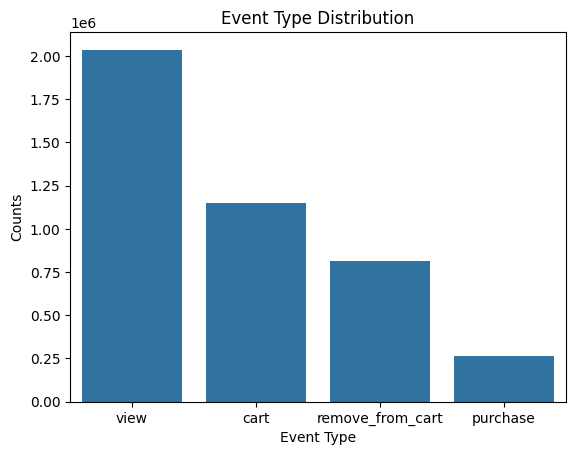

In [54]:
events = df['event_type'].value_counts()

sns.barplot(x=events.index, y= events.values)
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'top 10 most viewd brand')

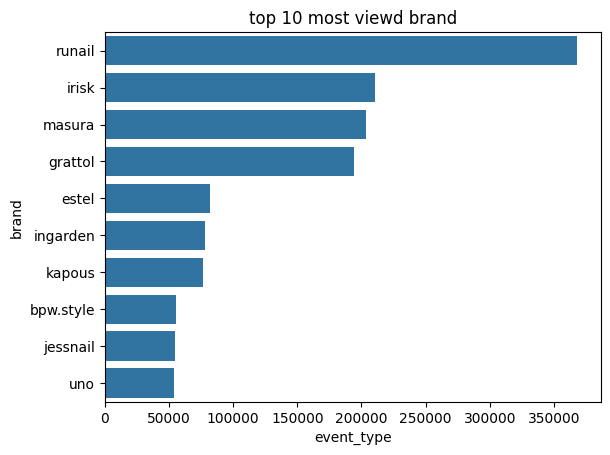

In [57]:
top_brands = (
    df[df['brand'].notna()]
    .groupby('brand')['event_type']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(data=top_brands, x='event_type', y='brand')
plt.title('top 10 most viewd brand')

<h2>Define and viaualize the funnel</h2>

reshaping the data to create the fuunel

In [93]:

flow_count = [
    df[df['event_type']=='view'].shape[0],
    df[df['event_type']=='cart'].shape[0],
    df[df['event_type']=='remove_from_cart'].shape[0],
    df[df['event_type']=='purchase'].shape[0]
]

In [98]:
from plotly import graph_objects as go

funnel_stages = ['View Products', 'Add to cart', 'Remove from cart','Complete Purchase']


fig = go.Figure(go.Funnel( x=flow_count, y=funnel_stages, textinfo = 'value+percent initial'))
fig.show()


* 56% of visitors have added products to their cart
* only 13% have completed a purchase

conversion rates